<a href="https://colab.research.google.com/github/GoodJinMo/kfq_ML_2023/blob/main/%EC%98%81%EC%83%81%EC%B2%98%EB%A6%AC_%EC%86%90%EA%B8%80%EC%94%A8_%EC%98%81%EC%97%AD_%EB%A7%88%ED%82%B9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
from google.colab.patches import cv2_imshow

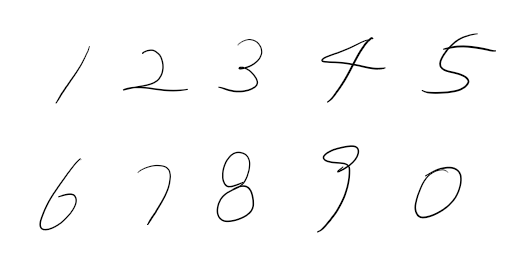

In [2]:
src_img=cv2.imread("im.png",cv2.IMREAD_COLOR)
cv2_imshow(src_img)

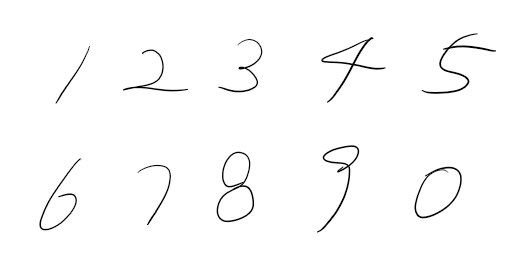

In [10]:
cpy_img=src_img.copy()
gray_img=cv2.cvtColor(cpy_img,cv2.COLOR_BGR2GRAY)
cv2_imshow(gray_img)

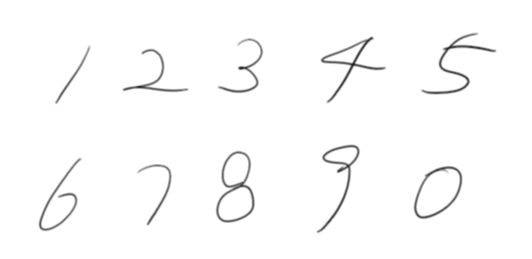

In [11]:
blur_img=cv2.GaussianBlur(gray_img,(3,3),0) #가우시안 블러
cv2_imshow(blur_img)

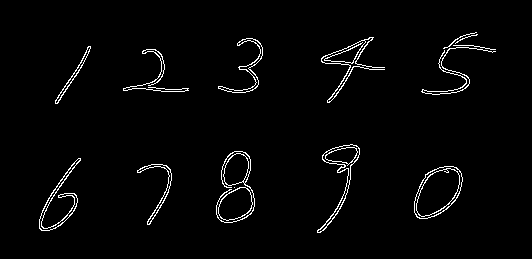

In [12]:
canny_img=cv2.Canny(blur_img,50,180)
cv2_imshow(canny_img)

In [13]:
contours,_=cv2.findContours(canny_img,
                 cv2.RETR_TREE,
                 cv2.CHAIN_APPROX_SIMPLE)

In [17]:
store_xywh=[]
for contour in contours:
  x,y,w,h = cv2.boundingRect(contour)
  flag = False #비슷한 데이터가 없다.
  if (w>=30) and (h>=40):
    for sv in store_xywh:
      gx = abs(sv[0]-x)
      gy = abs(sv[1]-y)
      if (gx<5) and (gy<5):
        flag = True #이미 비슷한 것 찾은 게 있네
        break
    if flag == False: #비슷한 것을 발견하지 못함
      store_xywh.append([x,y,w,h])

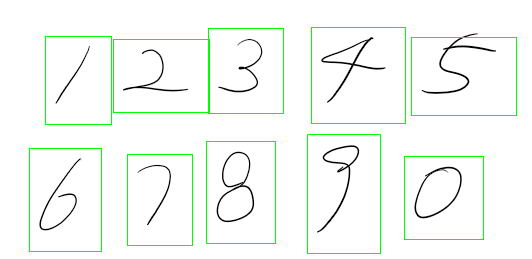

In [20]:
for sv in store_xywh:
  x,y,w,h = sv
  cv2.rectangle(src_img,
     (x-10,y-10),
     (x+w+20,y+h+20),
     (0,255,0),1)
cv2_imshow(src_img)